In [1]:
#importing the libraries
import os # for file related and system handling
import shutil ## for file related and system handling

In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
#  ! kaggle competitions download -c 'name-of-competition'

Saving kaggle.json to kaggle.json


In [3]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition # to download the data from kaggle api command

 99% 540M/544M [00:15<00:00, 16.3MB/s]
100% 544M/544M [00:15<00:00, 36.8MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 99.3MB/s]
 98% 266M/271M [00:08<00:00, 48.2MB/s]
100% 271M/271M [00:08<00:00, 34.1MB/s]


In [5]:
#Create a seperate directory for different classes
!mkdir /content/Test
!mkdir /content/Train
!mkdir /content/Train/dog
!mkdir /content/Train/cat

mkdir: cannot create directory ‘/content/Test’: File exists
mkdir: cannot create directory ‘/content/Train’: File exists
mkdir: cannot create directory ‘/content/Train/dog’: File exists
mkdir: cannot create directory ‘/content/Train/cat’: File exists


In [ ]:
#Unzipping the data
!unzip train.zip
!unzip test.zip

In [7]:
#Copying the data to required folders

for filename in os.listdir("/content/train"):
  # print(filename)
  if "cat" in filename:
    shutil.copy(os.path.join("/content/train",filename),"/content/Train/cat")
  else :
    shutil.copy(os.path.join("/content/train",filename),"/content/Train/dog")

for filename in os.listdir("/content/test"):
    shutil.copy(os.path.join("/content/test",filename),"/content/Test")

In [21]:
#Defining model
#Alexnet 
import keras
model=keras.Sequential()
model.add(keras.layers.Conv2D(filters=96,kernel_size=(11,11),strides=4,padding='valid',activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(pool_size=(3,3),strides=2))

model.add(keras.layers.Conv2D(filters=256,kernel_size=(5,5),padding='same',activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(3,3),strides=2))

model.add(keras.layers.Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(keras.layers.Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu'))
# model.add(keras.layers.Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu'))

# model.add(keras.layers.MaxPool2D(pool_size=(3,3),strides=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(4096,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(4096,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))

from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-3),metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 35, 35, 96)        34944     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 17, 17, 96)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 17, 17, 256)       614656    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 384)         885120    
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 8, 8, 384)         1327488   
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 384)        

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split
batch_size=32
train_generator = train_datagen.flow_from_directory(
    "/content/Train",
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') 
# set as training data

validation_generator = train_datagen.flow_from_directory(
    "/content/Train", # same directory as training data
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') 
# set as validation data
nb_epochs=15
model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs)

In [19]:
from keras.models import load_model
model.save('Alexnet_version1.h5')  # creates a HDF5 file 'my_model.h5'
model = load_model('Alexnet_version1.h5')

In [60]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os

# image folder
folder_path = '/content/Test'
# path to model
model_path = "Alexnet_version1.h5"
# dimensions of images
img_width, img_height = 150, 150

# load the trained model
model = load_model(model_path)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# load all images into a list
images = []

filelist = os.listdir(folder_path)
filelist = sorted(filelist,key=lambda x: int(os.path.splitext(x)[0]))

for img in filelist:
  img = os.path.join(folder_path, img)
  img = image.load_img(img, target_size=(img_width, img_height))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict_classes(images, batch_size=10)
print(classes)
classes = train_generator.class_indices
classes
# (1 = dog, 0 = cat).

[[0]
 [1]
 [0]
 ...
 [1]
 [1]
 [0]]


In [61]:
import pandas as pd
df=pd.read_csv("/content/sample_submission.csv")
df.label=classes
df.head(15)

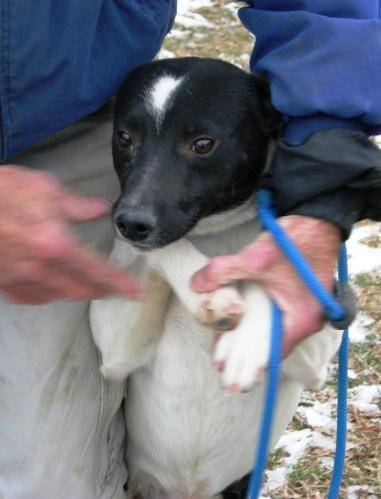

In [76]:
from IPython.display import Image
Image(filename="/content/Test/1.jpg")